## EDA - Final Assignment

https://archive.ics.uci.edu/ml/machine-learning-databases/autos/

In this jupyter notebook we'll:
1. Load a dataset
2. Handle missing data
3. Remove any outliers
4. Split into train/test
5. Impute any missing values
6. Standardise the data
7. Train a LR model

In [144]:
import wget

#wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')

1. symboling:                -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses:        continuous from 65 to 256.
3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type:                diesel, gas.
5. aspiration:               std, turbo.
6. num-of-doors:             four, two.
7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels:             4wd, fwd, rwd.
9. engine-location:          front, rear.
10. wheel-base:               continuous from 86.6 120.9.
11. length:                   continuous from 141.1 to 208.1.
12. width:                    continuous from 60.3 to 72.3.
13. height:                   continuous from 47.8 to 59.8.
14. curb-weight:              continuous from 1488 to 4066.
15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
17. engine-size:              continuous from 61 to 326.
18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore:                     continuous from 2.54 to 3.94.
20. stroke:                   continuous from 2.07 to 4.17.
21. compression-ratio:        continuous from 7 to 23.
22. horsepower:               continuous from 48 to 288.
23. peak-rpm:                 continuous from 4150 to 6600.
24. city-mpg:                 continuous from 13 to 49.
25. highway-mpg:              continuous from 16 to 54.
26. price:                    continuous from 5118 to 45400.

In [145]:
headers = ["symboling", "normalized-losses", "make", "fuel-type",  "aspiration", "num-of-doors", "body-style", 
           "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", 
           "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", 
           "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

In [146]:
import pandas as pd
pd.set_option('display.max_columns', 30) #so all columns are rendered

df = pd.read_csv('imports-85.data', names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

*Price has type 'object' instead of a numeric type, indicating there's probably a string in the midst of the numbers..*

In [148]:
import numpy as np
[p for p in df['price'].unique() if not np.char.isnumeric(p)]

['?']

In [149]:
df[df['price'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


*We can see that there are 4 rows with '?' for price. We'll have to drop these.  There are some other columns that should be numeric, but have dtype object, so let's inspect those also: [normalized-losses, stroke, bore, peak-rpm, horsepower]*

In [150]:
def p_is_float(x):
    try:
        float(x)
    except:
        return False
    return True 
    
for col in ["normalized-losses", "stroke", "bore", "peak-rpm", "horsepower"]:
    print(col, [p for p in df[col].unique() if not p_is_float(p)])

normalized-losses ['?']
stroke ['?']
bore ['?']
peak-rpm ['?']
horsepower ['?']


*We can replace these values with a np.nan, or we can reimport the csv file, replacing '?' with np.nan*

In [151]:
df = pd.read_csv('imports-85.data', names=headers, na_values=["?"])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

*This looks to have fixed the issue, and the column data types look to be correct now*

In [153]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [154]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## Drop missing price rows
*As price is the target column, it doesn't make sense to impute these values, so we should drop these rows*

In [155]:
df.shape

(205, 26)

In [156]:
df.dropna(subset=['price'], inplace=True)

In [157]:
df.shape

(201, 26)

## Explore Data...

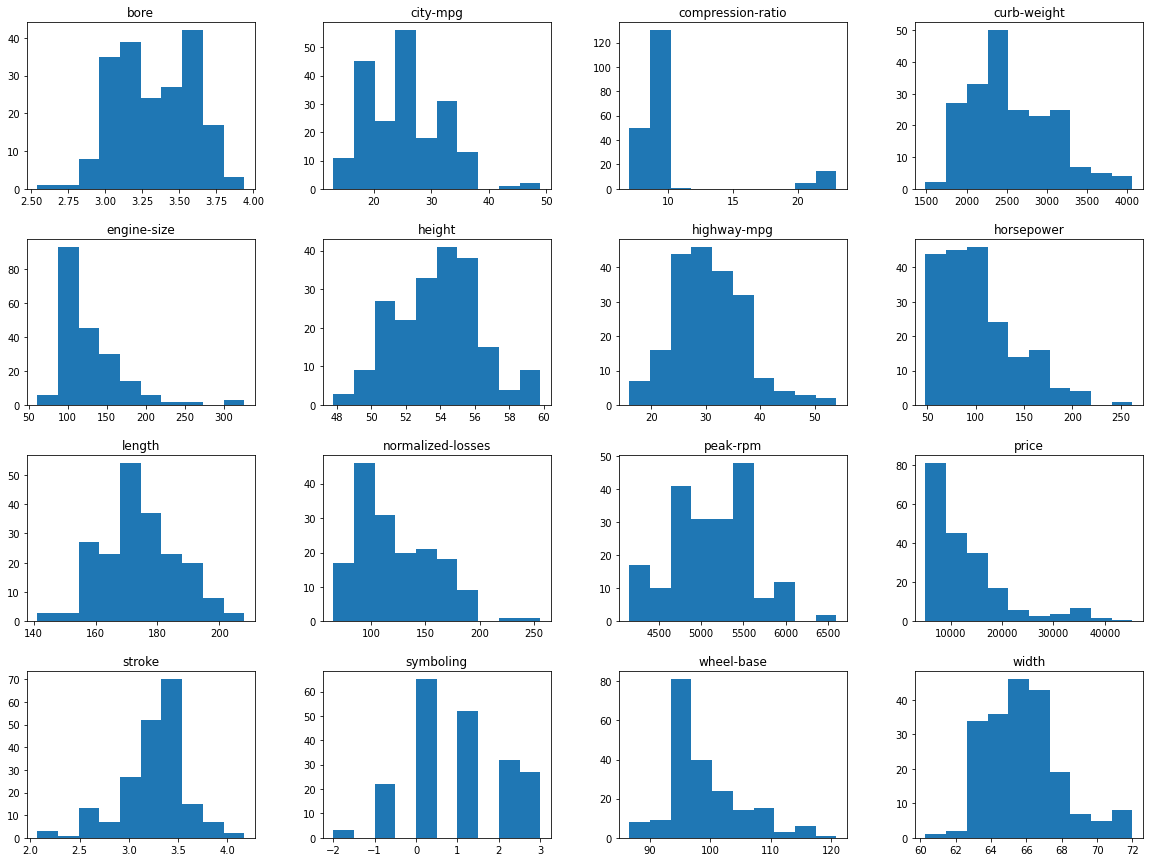

In [158]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    _ = df.hist(figsize=(20,15), grid=False)

In [159]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1,0.53,-0.54,-0.37,-0.24,-0.55,-0.23,-0.11,-0.14,-0.0082,-0.18,0.076,0.28,-0.036,0.036,-0.082
normalized-losses,0.53,1,-0.074,0.023,0.11,-0.43,0.12,0.17,-0.036,0.066,-0.13,0.3,0.26,-0.26,-0.21,0.2
wheel-base,-0.54,-0.074,1,0.88,0.81,0.59,0.78,0.57,0.49,0.16,0.25,0.37,-0.36,-0.47,-0.54,0.58
length,-0.37,0.023,0.88,1,0.86,0.49,0.88,0.69,0.61,0.12,0.16,0.58,-0.29,-0.67,-0.7,0.69
width,-0.24,0.11,0.81,0.86,1,0.31,0.87,0.73,0.54,0.19,0.19,0.62,-0.25,-0.63,-0.68,0.75
height,-0.55,-0.43,0.59,0.49,0.31,1,0.31,0.075,0.19,-0.063,0.26,-0.087,-0.31,-0.05,-0.1,0.14
curb-weight,-0.23,0.12,0.78,0.88,0.87,0.31,1,0.85,0.64,0.17,0.16,0.76,-0.28,-0.75,-0.79,0.83
engine-size,-0.11,0.17,0.57,0.69,0.73,0.075,0.85,1,0.58,0.21,0.029,0.82,-0.26,-0.65,-0.68,0.87
bore,-0.14,-0.036,0.49,0.61,0.54,0.19,0.64,0.58,1,-0.055,0.0013,0.57,-0.28,-0.59,-0.6,0.54
stroke,-0.0082,0.066,0.16,0.12,0.19,-0.063,0.17,0.21,-0.055,1,0.19,0.1,-0.068,-0.035,-0.035,0.082


*Length looks to be highly correlated with 'wheel-base', 'width', 'curb-weight'. And moderate correlation with 'height', 'engine-size', 'bore', horsepower'.*

*Price looks to be correlated with length, engine-size, horsepower and mpg*

## Categorical Features

In [160]:
df.select_dtypes(include='object').head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


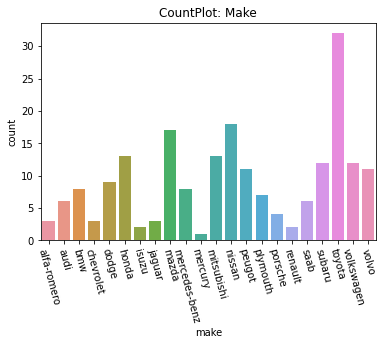

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

_ = sns.countplot(df['make']).set_title("CountPlot: Make")
plt.xticks(rotation=-75)
plt.show()

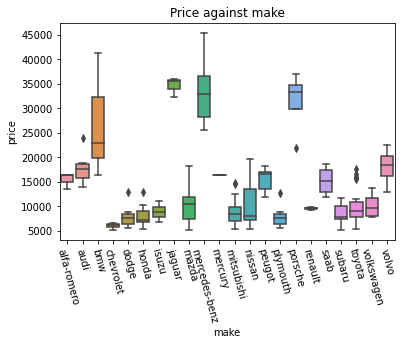

In [162]:
sns.boxplot(x='make', y='price', data=df).set_title("Price against make")
plt.xticks(rotation=-75)
plt.show()

*We can see that between makes of cars there are different price ranges. There are 4 brands which dominate the top price range (BMW, Jaguar, Mercedes-Benz, Porsche)*

*I'll repeat the same graphs for each of the categorical features*

In [163]:
df.select_dtypes(include='object').columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [164]:
def plot_categorical_pair(label, df, order=None):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    sns.countplot(df[label], ax=ax[0], order=order).set_title(f"{label}")
    sns.boxplot(x=label, y='price', ax=ax[1], data=df, order=order).set_title(f"Price against {label}")
    plt.show()    

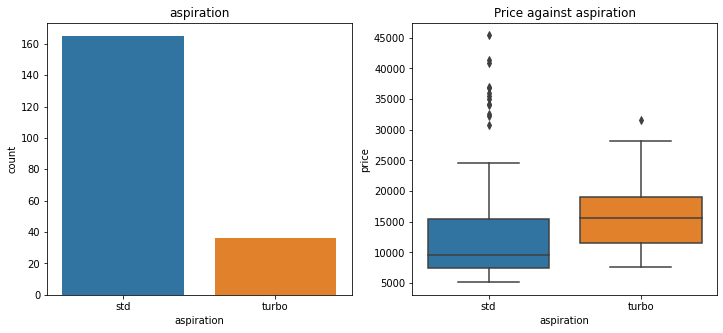

In [165]:
plot_categorical_pair('aspiration', df)

*There are fewer turbo cars than standard cars in our dataset. And as a group the median price is higher than standard. Though, most of the very expensive cars have standard aspiration* 

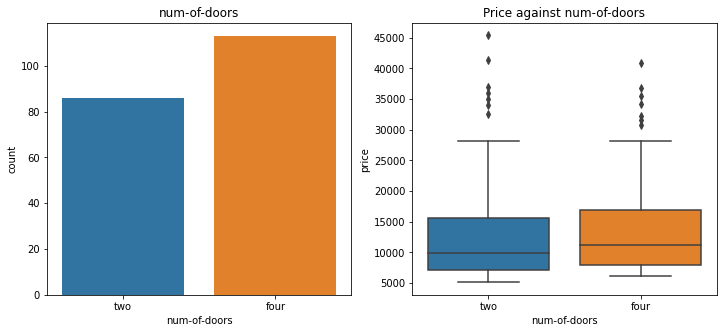

In [166]:
plot_categorical_pair('num-of-doors', df)

*4-door cars are a bit more common than 2-doors in our dataset. There doesn't seem to be much price difference across types*

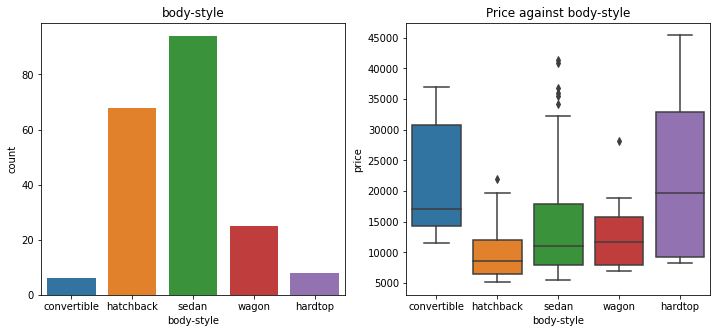

In [167]:
plot_categorical_pair('body-style', df)

*Sedans and Hatchbacks are the most frequent body types. Hatchbacks and wagons are less expensive than other types.*

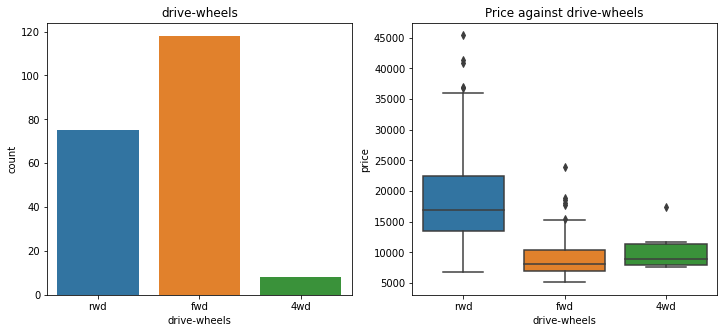

In [168]:
plot_categorical_pair("drive-wheels", df)

*Forward-wheel drive cars are the most common type of car. There are very few 4-wheel drive cars in the dataset. More expensive cars are rear-wheel drive, and 4-wheel drive* 

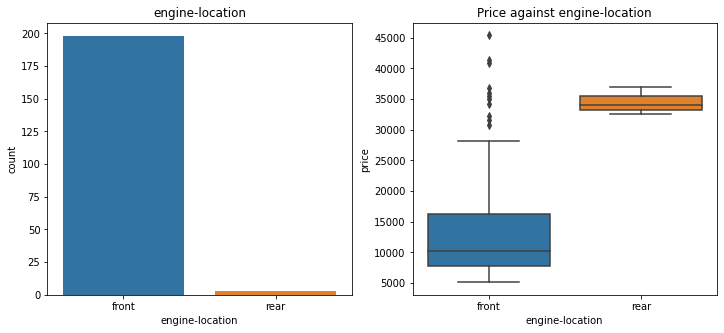

In [169]:
plot_categorical_pair("engine-location", df)

In [170]:
df[df['engine-location'] == 'rear']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,32528.0
127,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,34028.0
128,3,NaN,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,37028.0


*The location of the engine is a clear indicator of price, but there are very few cars with rear engine. All are the same make. Looking at the 3 observations for this car... The first two are identical but for price, differing by 1.5K. The last one has a similar spec, though it is a convertible, slightly heavier and is 3K more expensive than the the most expensive hardtop model.*

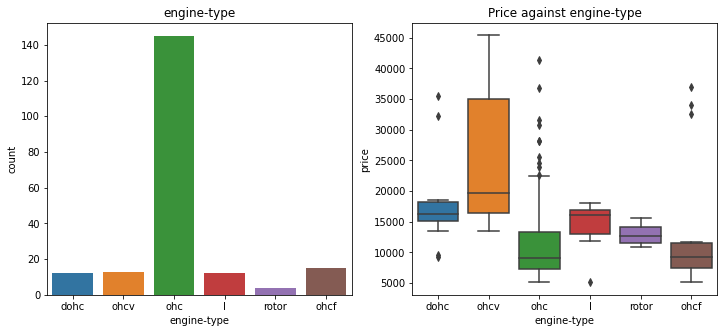

In [171]:
plot_categorical_pair("engine-type", df)

*OHC engine type is the most frequent, and has a wide price range, and quite a few observations 1.5x above IQR. OHCV is infrequent, and has a wide range of prices. The remaining types (OHCF, rotor, DOHC) mostly have prices that fall below 20K, with some outliers that we should investigate*

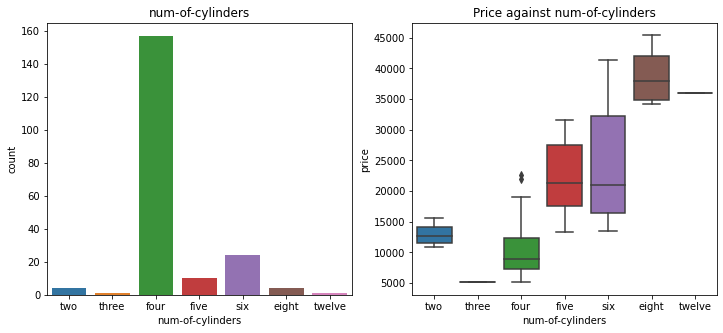

In [172]:
plot_categorical_pair('num-of-cylinders', df, ["two", "three", "four", "five", "six", "eight", "twelve"])

In [173]:
df[df['num-of-cylinders'] == 'three']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0


*Price increases with the number of cylinders.*

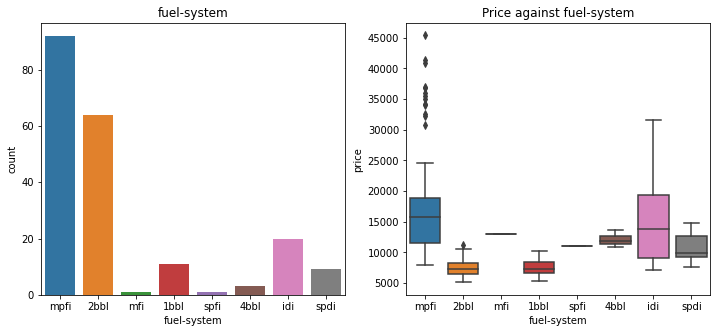

In [174]:
plot_categorical_pair('fuel-system', df)

*mpfi is the most frequently occuring fuel-system, but has a wide range of prices. 2bbl fuel-system is second most frequent, and is a good indicator of a lower price, as is 1bbl*

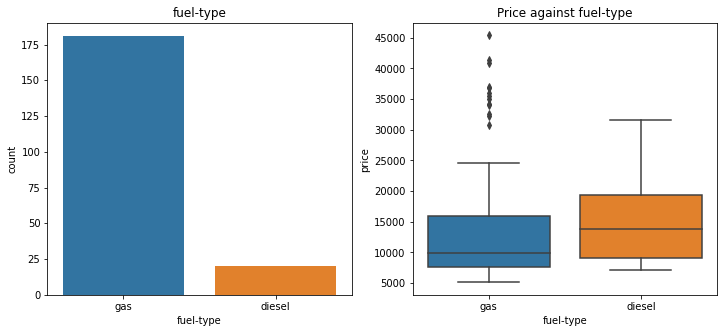

In [175]:
plot_categorical_pair("fuel-type", df)

*Gas is much more common than diesel. Diesels have a slightly higher median price*

## Encode Categorical

In [176]:
training_columns = [col for col in df.columns if (col != 'price')]
X = df[training_columns].copy()
y = df['price']

*Based on initial analysis above, I'm going to drop some categorical features that didn't show much difference in distinguishing price*

In [177]:
features_to_drop = ['aspiration', 'num-of-doors', 'body-style']
X.drop(columns=features_to_drop, inplace=True)

*I'm also going to drop 'engine-location' as rear engine location only occurs in Porsche, so it's not more generably applicable*

In [178]:
X.drop(columns=["engine-location"], inplace=True)

In [179]:
for col in X.select_dtypes(include='object').columns.values:
    print(col, df[col].nunique())

make 22
fuel-type 2
drive-wheels 3
engine-type 6
num-of-cylinders 7
fuel-system 8


In [180]:
low_cardinality = ['fuel-type', 'drive-wheels']
high_cardinality = ['make','engine-type','fuel-system']

In [181]:
X.shape

(201, 21)

In [182]:
X[low_cardinality].head()

,fuel-type,drive-wheels
0,gas,rwd
1,gas,rwd
2,gas,rwd
3,gas,fwd
4,gas,4wd


## Label Simple Encoding for features with low cardinality

In [183]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoded = encoder.fit_transform(X[low_cardinality])

X['fuel-type'] = encoded[:, 0]
X['drive-wheels'] = encoded[:, 1]
X[low_cardinality].head()

,fuel-type,drive-wheels
0,1.0,2.0
1,1.0,2.0
2,1.0,2.0
3,1.0,1.0
4,1.0,0.0


## Custom encoding num-of-cylinders

*num of cylinders is given in the data as a categorical variable. But we can convert it to a quantitative variable.* 

In [184]:
X['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [185]:
X['num-of-cylinders'].replace({
    'two' :2,
    'three' :3,    
    'four':4, 
    'five' :5, 
    'six' :6, 
    'eight' :8, 
    'twelve' :12
}, inplace=True)

In [186]:
X['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

## Split train/test

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31)
X_train = X_train.copy()
X_test = X_test.copy()

## Target encoding for features with higher cardinality

In [188]:
from category_encoders.target_encoder import TargetEncoder
encoder = TargetEncoder(cols=high_cardinality)
encoder.fit(X_train, y_train) 
encoded = encoder.transform(X_train)
test_encoded = encoder.transform(X_test)

In [189]:
X_train['make_enc'] = encoded['make']
X_train['engine-type_enc'] = encoded['engine-type']
X_train['fuel-system_enc'] = encoded['fuel-system']

X_test['make_enc'] = test_encoded['make']
X_test['engine-type_enc'] = test_encoded['engine-type']
X_test['fuel-system_enc'] = test_encoded['fuel-system']

In [190]:
X_train.drop(columns=high_cardinality, inplace=True)
X_test.drop(columns=high_cardinality, inplace=True)

In [191]:
X_train.head(5)

,symboling,normalized-losses,fuel-type,drive-wheels,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_enc,engine-type_enc,fuel-system_enc
65,0,118.0,1.0,2.0,104.9,175.0,66.1,54.4,2670,4,140,3.76,3.16,8.0,120.0,5000.0,19,27,10086.094626,11797.657895,17264.707692
75,1,NaN,1.0,2.0,102.7,178.4,68.0,54.8,2910,4,140,3.78,3.12,8.0,175.0,5000.0,19,24,12967.380000,11797.657895,17264.707692
82,3,NaN,1.0,1.0,95.9,173.2,66.3,50.2,2833,4,156,3.58,3.86,7.0,145.0,5000.0,19,24,9377.981887,11797.657895,10351.293717
105,3,194.0,1.0,2.0,91.3,170.7,67.9,49.7,3139,6,181,3.43,3.27,7.8,200.0,5200.0,17,23,11149.011172,22013.434216,17264.707692
51,1,104.0,1.0,1.0,93.1,159.1,64.2,54.1,1900,4,91,3.03,3.15,9.0,68.0,5000.0,31,38,10086.094626,11797.657895,7506.020000


In [192]:
X_test.head(5)

,symboling,normalized-losses,fuel-type,drive-wheels,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_enc,engine-type_enc,fuel-system_enc
71,-1,NaN,1.0,2.0,115.6,202.6,71.7,56.5,3740,8,234,3.46,3.10,8.3,155.0,4750.0,16,18,29424.968748,22013.434216,17264.707692
56,3,150.0,1.0,2.0,95.3,169.0,65.7,49.6,2380,2,70,NaN,NaN,9.4,101.0,6000.0,17,23,10086.094626,12967.380000,12967.380000
134,3,150.0,1.0,1.0,99.1,186.6,66.5,56.1,2707,4,121,2.54,2.07,9.3,110.0,5250.0,21,28,15887.134008,11797.657895,17264.707692
108,0,161.0,0.0,2.0,107.9,186.7,68.4,56.7,3197,4,152,3.70,3.52,21.0,95.0,4150.0,28,33,15446.945976,15446.945976,16420.444301
37,0,106.0,1.0,1.0,96.5,167.5,65.2,53.3,2236,4,110,3.15,3.58,9.0,86.0,5800.0,27,33,7907.224473,11797.657895,7348.662647


In [193]:
X_train.shape

(150, 21)

In [194]:
X_test.shape

(51, 21)

*Very few observations so, we'll have to be selective about the number of features we use in our model*

## Impute missing

In [195]:
X_train.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'drive-wheels',
       'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'make_enc', 'engine-type_enc', 'fuel-system_enc'],
      dtype='object')

In [196]:
idx = X_train.isna().sum()
idx[idx > 0]

normalized-losses    26
bore                  1
stroke                1
horsepower            1
peak-rpm              1
dtype: int64

In [197]:
from sklearn.impute import KNNImputer
import numpy as np

imp = KNNImputer(np.nan, n_neighbors=2)
X_train_imputed = imp.fit_transform(X_train)
X_test_imputed = imp.transform(X_test)

## Train LR

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression().fit(X_train_imputed, y_train)
y_pred = model.predict(X_train_imputed)
print(f'Training MAE: {mean_absolute_error(y_train, y_pred):.2f}')
print(f'Training R2: {r2_score(y_train, y_pred):.2f}')
print()
y_test_pred = model.predict(X_test_imputed)
print(f'Test MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'Test R2: {r2_score(y_test, y_test_pred):.2f}')

Training MAE: 1457.29
Training R2: 0.93

Test MAE: 2135.73
Test R2: 0.88


## Conclusion

1. We acheived a reasonable MAE with our first model
2. Looking at the differences in the training / test MAE, our model appears to be overfitting. 
3. Likely causes to investigate overfitting would be: 
    1. The high number of features (21 features) relative to observations. 
    2. Target encoding tends to overfit. 
    3. The train/test split. 
3. We should plot the residuals, and examine where our model does well, not well.
4. We could look at some further feature engineering, feature selection to reduce the number of features.
5. We could also try some different models.
6. This is just one possible solution to the EDA for this data. There are other possible solutions.